In [1]:
# This is for testing code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def compute_cost(x, y, theta, m): # Compute cost for linear regression.

    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors) # cost function, sum of squared errors
    return J

In [4]:
def gradient_descent(x, y, a, b, theta, alpha, iterations, lengthTrain, lengthTest): # Compute cost for linear regression.

    cost_history = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / lengthTrain) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta, lengthTrain)
        cost_history_test[i] = compute_cost(a, b, theta, lengthTest)
        
    return theta, cost_history, cost_history_test

In [5]:
def data_organize(data,length,scaling,problem): # Organize data into matrix for use with gradient descent algorithm
    
    cols = len(data.columns)
    C = [0]*cols
    
    for i in range(len(C)):
        B = data.values[:, i]
        X = B.reshape(length, 1)
        C[i] = X
    
    # if scaling is activated, scales price, specific to dataset in 1a)
    end = int(len(C) - 1)
    if scaling == 1:
        C[0]=C[0]*10**(-3) 
        Y = data.values[:, end]*10**(-6)
    else:
        Y = data.values[:, end]

    initial = np.ones((length, 1)) # Create a 99x1 array of ones
    
    # PROBLEM IS HERE WITH .hstack(), can .hstack() be dynamic?
    if problem == 0:
        X_tot = np.hstack((initial,C[0],C[1],C[2],C[3],C[4]))
    else:
        X_tot = np.hstack((initial,C[0],C[1],C[2],C[3],C[4],C[5],C[6],C[7],C[8],C[9]))

      
    return X_tot, Y

In [6]:
# Import housing list 
housing = pd.read_csv('Housing.csv')
print(housing.shape)

# 1a Variables
varlist1 = ['area','bedrooms','bathrooms','stories','parking','price']
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

housing.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Binary Variables DOES THIS ACTUALLY WORK?
binary_varlist = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning','prefarea']

#varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning',
# Defining the map function
         
def binary_map(x):
         return x.map({'yes':1,"no":0})
         
# Applying the function to the housing list
housing[binary_varlist]=housing[binary_varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into two sets specified in train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, test_size = 0.3, train_size = 0.7, random_state = 1 )

# Get the lengths of the training and test set
mTrain = len(df_train)
mTest = len(df_test)

print('Dimensions of df_train:',df_train.shape)
print('Dimensions of df_train:',df_test.shape)

Dimensions of df_train: (381, 13)
Dimensions of df_train: (164, 13)


In [9]:
df_NewtrainA = df_train[varlist1]
df_NewtestA = df_test[varlist1]

df_NewtrainB = df_train[varlist2]
df_NewtestB = df_test[varlist2]

print('Dimensions of training set used in 1a:', df_NewtrainA.shape)
print('Dimensions of training set used in 1b:', df_NewtrainB.shape)
#print(df_NewtrainA[: 5])
print(df_NewtrainB[: 3])

Dimensions of training set used in 1a: (381, 6)
Dimensions of training set used in 1b: (381, 12)
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
180  4500         4          2        1         0          0         1   
189  3540         2          1        1         0          1         1   
93   7200         3          2        1         1          0         1   

     hotwaterheating  airconditioning  parking  prefarea    price  
180                0                1        2         0  5215000  
189                0                0        0         0  5040000  
93                 0                1        3         0  6300000  


In [10]:
xTrainA, yTrainA = data_organize(df_NewtrainA,mTrain,1,0)
xTestA, yTestA = data_organize(df_NewtestA,mTest,1,0)

mTrainB = len(df_NewtrainB)
mTestB = len(df_NewtestB)

xTrainB, yTrainB = data_organize(df_NewtrainB,mTrainB,1,2)
xTestB, yTestB = data_organize(df_NewtrainB,mTrain,1,2)

In [11]:
thetaA = np.zeros(6) # row vector for Theta initialized to 0
thetaB = np.zeros(11)
iterations = 200;

alpha1 = 0.01; # Comparing 3 different training rates
alpha2 = 0.02;
alpha3 = 0.042;

In [12]:
# Run Cost History and Gradient Descent algorithms for training data
thetaTrainA1, cost_historyTrainA1, cost_historyTestA1 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.01, iterations, mTrain, mTest)
thetaTrainA2, cost_historyTrainA2, cost_historyTestA2 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.03, iterations, mTrain, mTest)
thetaTrainA3, cost_historyTrainA3, cost_historyTestA3 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.04, iterations, mTrain, mTest)

thetaTrainB1, cost_historyTrainB1, cost_historyTestB1 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.01, iterations, mTrainB, mTestB)
thetaTrainB2, cost_historyTrainB2, cost_historyTestB2 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.03, iterations, mTrainB, mTestB)
thetaTrainB3, cost_historyTrainB3, cost_historyTestB3 = gradient_descent(xTrainB, yTrainB, xTestB, yTestB, thetaB, 0.04, iterations, mTrainB, mTestB)

print('Final value of theta1 =', thetaTrainA1)
print('Cost History for Training1:', cost_historyTrainA1[: 10]) # Here the cost history just blows up without a small enough learning rate
print('Cost History for Testing1:', cost_historyTestA1[: 10])

Final value of theta1 = [0.13704238 0.33468751 0.35999223 0.52877376 0.5115619  0.31372862]
Cost History for Training1: [4.44256749 1.99836155 1.29819849 1.09388494 1.03067776 1.00775209
 0.99644672 0.98860956 0.98191747 0.97570414]
Cost History for Testing1: [4.8857971  2.35423482 1.55919425 1.29157565 1.19184296 1.14939921
 1.12835867 1.11616443 1.10799824 1.10182766]


In [13]:
###### PROBLEM 1a ##############################################################################

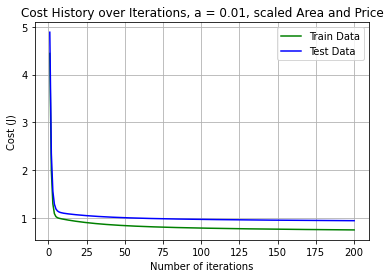

In [14]:
plt.plot(range(1, iterations + 1),cost_historyTrainA1, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA1, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.legend()

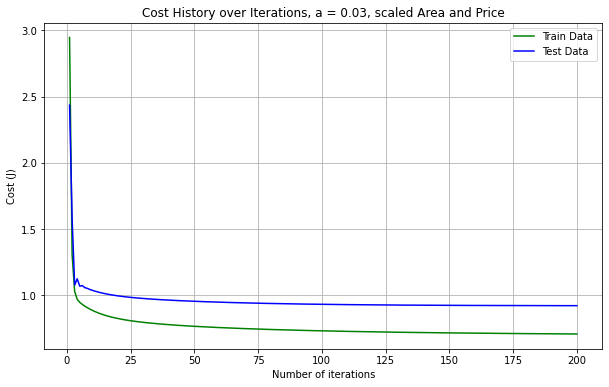

In [15]:
plt.plot(range(1, iterations + 1),cost_historyTrainA2, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA2, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.03, scaled Area and Price')
plt.legend()

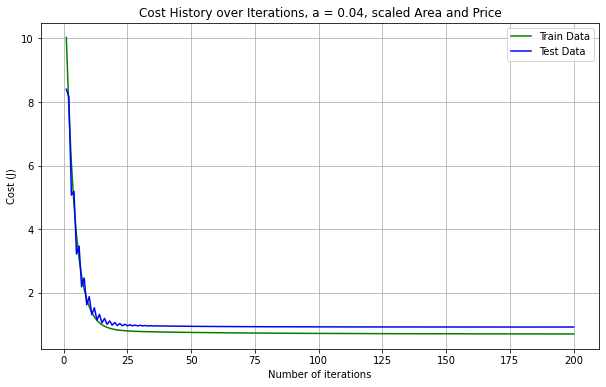

In [16]:
plt.plot(range(1, iterations + 1),cost_historyTrainA3, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA3, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.04, scaled Area and Price')
plt.legend()

In [17]:
###### PROBLEM 1b ##############################################################################

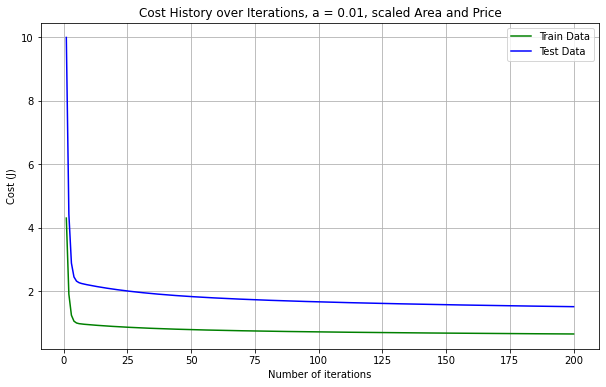

In [18]:
plt.plot(range(1, iterations + 1),cost_historyTrainB1, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB1, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.legend()

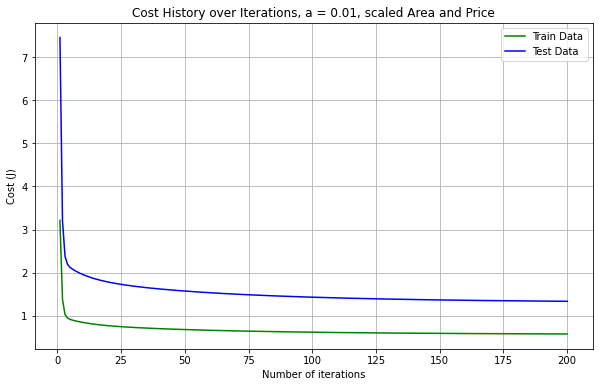

In [19]:
plt.plot(range(1, iterations + 1),cost_historyTrainB2, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB2, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.legend()

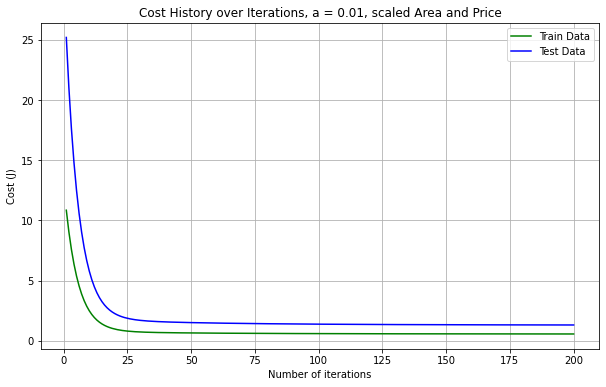

In [20]:
plt.plot(range(1, iterations + 1),cost_historyTrainB3, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestB3, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.legend()

In [21]:
###### PROBLEM 2a ##############################################################################

In [22]:
#As you know, there are two common ways of rescaling:
#1. Min-Max scaling
#2. Standardisation (mean-0, sigma-1)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# define standard scaler
#scaler = StandardScaler()
scaler=MinMaxScaler()
df_NewtrainA[varlist1]= scaler.fit_transform(df_NewtrainA[varlist1])
df_NewtrainA.head(20)

,area,bedrooms,bathrooms,stories,parking,price
180,0.193103,0.6,0.333333,0.000000,0.666667,0.330000
189,0.126897,0.2,0.000000,0.000000,0.000000,0.313333
93,0.379310,0.4,0.333333,0.000000,1.000000,0.433333
444,0.097931,0.4,0.000000,0.333333,0.000000,0.140000
81,0.158621,0.4,0.333333,0.333333,0.333333,0.463333
345,0.021724,0.4,0.000000,0.333333,0.000000,0.200000
314,0.161379,0.2,0.000000,0.333333,0.333333,0.223333
115,0.434483,0.4,0.000000,0.000000,0.666667,0.406667
286,0.074966,0.4,0.000000,0.000000,0.000000,0.236667
400,0.124966,0.2,0.000000,0.000000,0.333333,0.166667


In [23]:
#y_NewtrainA = df_NewtrainA.pop('price')
#X_NewtrainA = df_NewtrainA

In [24]:
#y_NewtrainA.head()

In [26]:
#X_NewtrainA.head()

In [36]:
xTrainC, yTrainC = data_organize(df_NewtrainA,mTrain,0,0)
xTestC, yTestC = data_organize(df_NewtestA,mTest,0,0)

print('xTrainC: ',np.shape(xTrainC), xTrainC[: 5])
print('yTrainC: ',np.shape(yTrainC), yTrainC[: 5])

xTrainC:  (381, 6) [[1.         0.19310345 0.6        0.33333333 0.         0.66666667]
 [1.         0.12689655 0.2        0.         0.         0.        ]
 [1.         0.37931034 0.4        0.33333333 0.         1.        ]
 [1.         0.09793103 0.4        0.         0.33333333 0.        ]
 [1.         0.15862069 0.4        0.33333333 0.33333333 0.33333333]]
yTrainC:  (381,) [0.33       0.31333333 0.43333333 0.14       0.46333333]


In [34]:
thetaTrainA1, cost_historyTrainA1, cost_historyTestA1 = gradient_descent(xTrainC, yTrainC, xTestC, yTestC, thetaA, 0.01, iterations, mTrain, mTest)
#thetaTrainA2, cost_historyTrainA2, cost_historyTestA2 = gradient_descent(xTrainA, yTrainA, xTestA, yTestA, thetaA, 0.03, iterations, mTrain, mTest)

print('Final value of theta1 =', thetaTrainA1)
print('Cost History for Training1:', cost_historyTrainA1[: 10]) # Here the cost history just blows up without a small enough learning rate
print('Cost History for Testing1:', cost_historyTestA1[: 10])

Final value of theta1 = [0.18589269 0.06887448 0.08637094 0.04341051 0.07650836 0.07031203]
Cost History for Training1: [0.05498432 0.05378963 0.05262729 0.05149641 0.05039614 0.04932564
 0.04828411 0.04727077 0.04628483 0.04532557]
Cost History for Testing1: [1.33024179e+13 1.33023964e+13 1.33023751e+13 1.33023542e+13
 1.33023334e+13 1.33023130e+13 1.33022927e+13 1.33022728e+13
 1.33022530e+13 1.33022335e+13]


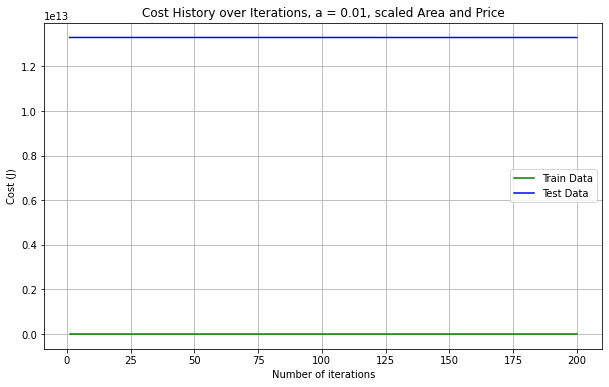

In [35]:
plt.plot(range(1, iterations + 1),cost_historyTrainA1, color='green', label='Train Data')
plt.plot(range(1, iterations + 1),cost_historyTestA1, color='blue', label='Test Data')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Cost History over Iterations, a = 0.01, scaled Area and Price')
plt.legend()